In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Code Practice 1: Determinant of small and Large singular matrices

# singular matrix (reduce- rank matrix) has a determinant of 0:
"""
generate a 2x2 matrix of integers and with linear dependencies
compute the rank
"""
A = np.array([[1, 3], [1, 3]])
print("Matrix A: \n", A), print()
print("Determinant of A = ", np.linalg.det(A))
print("Rank of A = ", np.linalg.matrix_rank(A))
print()
"""
generate mxm matrices
impose linear dependencies
compute the rank
small m and for large m
"""
m = 52
B = np.random.randint(20, size=(m, m))
print("Matrix B: \n", B), print()
B[:, 0] = B[:, 1]
print("Determinant of B = ", np.linalg.det(B))
print("Rank of B = ", np.linalg.matrix_rank(B))

Matrix A: 
 [[1 3]
 [1 3]]

Determinant of A =  0.0
Rank of A =  1

Matrix B: 
 [[19 16 17 ...  0  3  3]
 [ 6 13 15 ... 17 18 15]
 [ 6 15  6 ...  2  0 19]
 ...
 [15  2  0 ... 10 12 11]
 [ 2 19 16 ...  6  4 17]
 [12 12 13 ... 13  2 12]]

Determinant of B =  -4.689922453412444e+57
Rank of B =  51


In [3]:
# Code Practice 2: Determinant of (A*B) and Determinant of A and Determinant of B
# 1) for random 3x3 matrices
# 2) in a loop over random matrix sizes up to 40x40

A = np.random.randint(10, size=(3, 3))
B = np.random.randint(10, size=(3, 3))

AB = A@B
print([np.linalg.det(A), np.linalg.det(B), np.linalg.det(A)*np.linalg.det(B), np.linalg.det(AB)])

[-17.999999999999996, -12.000000000000005, 216.00000000000006, 216.00000000000006]


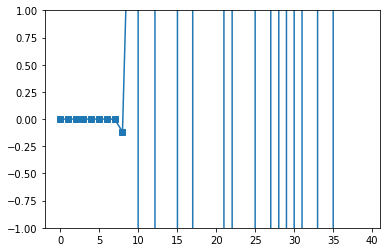

In [4]:
dets = np.zeros((40, 2))

for k in range(40):
    A = np.random.randint(10, size=(k, k))
    B = np.random.randint(10, size=(k, k))

    AB = A@B
    
    dets[k,0] = np.linalg.det(A)*np.linalg.det(B)
    dets[k,1] = np.linalg.det(AB)

plt.plot(dets[:,0]-dets[:,1],'s-')
plt.ylim([-1,1])
plt.show()

In [5]:
# Code Practice 3: Determinant of large matrices with row exchanges
# generate a matrix 6x6 matrix
A = np.random.randint(20, size=(6, 6))
print("Matrix A: \n", A), print()

# - compute the determinant
print("Determinant of A = ", np.linalg.det(A))
print()

# % -swap one row, det again
As = A[[0, 2, 1, 3, 4, 5], :]      # this swapping only apllicable on numpy array
print("Matrix A after swaping 1 row: \n", As), print()
print("Determinant of A after swaping 1 row = ", np.linalg.det(As))
print()

# -swap two rows, det again
Ass = A[[0, 2, 1, 4, 3, 5], :]
print("Matrix A after swaping 2 row: \n", Ass), print()
print("Determinant of A after swaping 2 row = ", np.linalg.det(Ass))
print()

Matrix A: 
 [[ 3 11 14 12  8  0]
 [ 4  2  9  2 12 15]
 [10  7 15 19 11 14]
 [12 16  1 10  1 13]
 [ 8  6  0 13 16  9]
 [16 18 19  4  2  2]]

Determinant of A =  12026451.000000007

Matrix A after swaping 1 row: 
 [[ 3 11 14 12  8  0]
 [10  7 15 19 11 14]
 [ 4  2  9  2 12 15]
 [12 16  1 10  1 13]
 [ 8  6  0 13 16  9]
 [16 18 19  4  2  2]]

Determinant of A after swaping 1 row =  -12026451.000000007

Matrix A after swaping 2 row: 
 [[ 3 11 14 12  8  0]
 [10  7 15 19 11 14]
 [ 4  2  9  2 12 15]
 [ 8  6  0 13 16  9]
 [12 16  1 10  1 13]
 [16 18 19  4  2  2]]

Determinant of A after swaping 2 row =  12026451.000000007



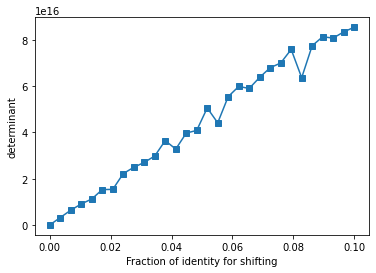

In [6]:
# Code Practice 4: Determinant of shifted matrices
"""
generate a square random matrx (20x20)
impose a linear dependence
"shift" the matrix (0->.1 times the identity matrix) (lambda)
compute the abs(determinant) of shifted matrix
repeat a 1000 times, take the average abs(det)
plot of determinant as a function of lambda

"""
lambdas = np.linspace(0, .1, 30)
temp = np.zeros(1000)

# initialize the determinant vector
dets = np.zeros(len(lambdas));

for deti in range(len(lambdas)):
    
    # run 1000 iterations
    for i in range(1000):
        
        # generate a matrix
        M = np.random.randint(10, size=(20, 20))
        M[:, 0] = M[:, 1]
        
        # compute the determinant
        temp[i] = abs(np.linalg.det(M + lambdas[deti]*np.eye(20)))
        
    # compute average determinant
    dets[deti] = np.mean(temp)

plt.plot(lambdas, dets, "s-")
plt.xlabel("Fraction of identity for shifting")
plt.ylabel("determinant")
plt.show()